In [1]:
#import seaborn as sns
import pandas
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('always')
filename = 'cat1.csv'
data = pandas.read_csv(filename)
print(data.shape)

(649, 39)


In [32]:
data.head()

,Unnamed: 0,galex_objid,sdss_objid,u,g,r,i,z,extinction_u,extinction_g,...,r-i,r-z,i-z,fuv-nuv,fuv-u,fuv-g,fuv-r,fuv-i,fuv-z,pred
0,0,2.489297e+18,1.237665e+18,18.286291,16.968243,16.334318,16.039885,15.857203,0.094921,0.073962,...,0.294434,0.477116,0.182682,-2.119261,-4.368679,-5.686728,-6.320652,-6.615086,-6.797768,0
1,1,2.489895e+18,1.237662e+18,22.734962,21.516233,20.178501,19.238029,18.809675,0.105131,0.081917,...,0.940472,1.368826,0.428354,-0.371609,-0.231091,-1.449820,-2.787552,-3.728024,-4.156378,1
2,2,2.489895e+18,1.237662e+18,21.223398,21.143623,21.149973,20.998989,21.145853,0.085433,0.066569,...,0.150984,0.004120,-0.146864,-1.134020,-2.778496,-2.858271,-2.851921,-3.002905,-2.856041,1
3,3,2.489895e+18,1.237662e+18,21.771444,21.636995,21.564974,21.476393,21.266085,0.074157,0.057783,...,0.088581,0.298889,0.210308,-0.945484,-1.074581,-1.209030,-1.281052,-1.369633,-1.579941,1
4,4,2.490880e+18,1.237662e+18,22.767988,22.018591,21.658953,21.098751,20.734152,0.050161,0.039085,...,0.560202,0.924801,0.364599,-0.822910,-1.516697,-2.266094,-2.625732,-3.185934,-3.550533,1


In [37]:
l =['pred','galex_objid','sdss_objid','Unnamed: 0','spectrometric_redshift', 'extinction_g', 'extinction_r','extinction_i', 'extinction_z','u-g', 'u-r', 'u-i','u-z', 'g-r','g-i', 'g-z', 'r-i', 'r-z', 'i-z','nuv-g', 'nuv-r', 'nuv-i', 'nuv-z', 'fuv-nuv', 'fuv-u', 'fuv-g','fuv-r', 'fuv-i', 'fuv-z']
X = data.drop(l,axis=1)

y = data['pred']
X.columns

Index(['u', 'g', 'r', 'i', 'z', 'extinction_u', 'nuv_mag', 'fuv_mag', 'class',
       'nuv-u'],
      dtype='object')

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [39]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='rbf')
print(svclassifier.fit(X_train, y_train))

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)
/home/vishwas/.local/lib/python3.5/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [40]:
y_pred = svclassifier.predict(X_test)
print(y_pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1
 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [41]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(set(y_test) - set(y_pred))

[[ 10   4]
 [  1 115]]
              precision    recall  f1-score   support

           0       0.91      0.71      0.80        14
           1       0.97      0.99      0.98       116

    accuracy                           0.96       130
   macro avg       0.94      0.85      0.89       130
weighted avg       0.96      0.96      0.96       130

set()


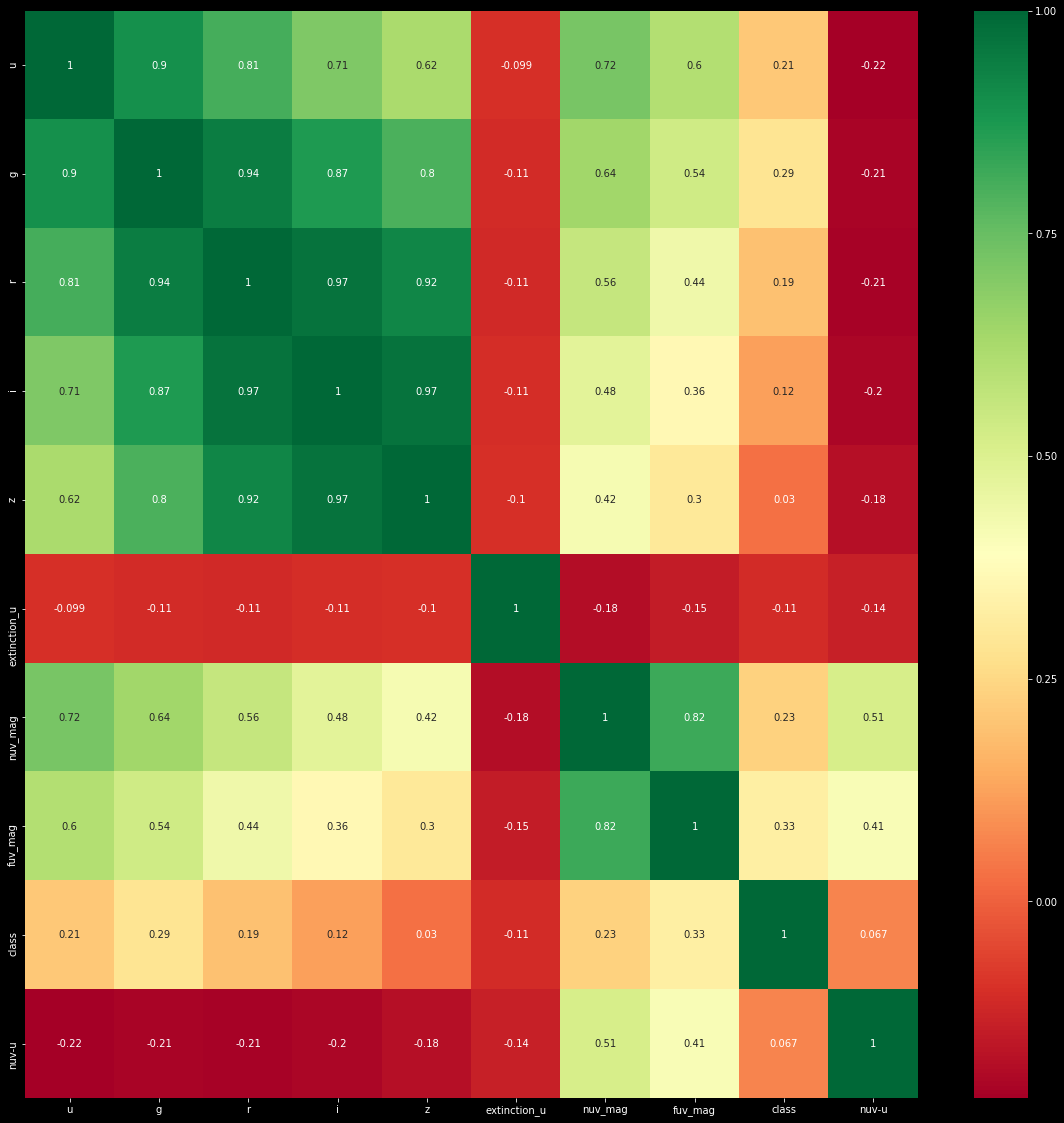

In [42]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = X.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(X[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 39 columns):
Unnamed: 0                649 non-null int64
galex_objid               649 non-null float64
sdss_objid                649 non-null float64
u                         649 non-null float64
g                         649 non-null float64
r                         649 non-null float64
i                         649 non-null float64
z                         649 non-null float64
extinction_u              649 non-null float64
extinction_g              649 non-null float64
extinction_r              649 non-null float64
extinction_i              649 non-null float64
extinction_z              649 non-null float64
nuv_mag                   649 non-null float64
fuv_mag                   649 non-null float64
class                     649 non-null int64
spectrometric_redshift    649 non-null float64
nuv-u                     649 non-null float64
nuv-g                     649 non-null float64
nuv-r 

In [44]:
from sklearn.grid_search import GridSearchCV

ImportError: No module named 'sklearn.grid_search'

In [144]:
param_grid={'C':[0.1,1,10,100,1000],'gamma':[0.1,1,0.01,0.001,0.0001]}

In [145]:
grid=GridSearchCV(SVC(),param_grid,verbose=0)

In [146]:
grid.fit(X_train,y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 10, 100, 1000], 'gamma': [0.1, 1, 0.01, 0.001, 0.0001]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [147]:
grid.best_params_

{'C': 1, 'gamma': 0.01}

In [148]:
grid.best_estimator_


SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [149]:
grid_predictions=grid.predict(X_test)
print(confusion_matrix(y_test,grid_predictions))
print("\n")
print(classification_report(y_test,grid_predictions))

[[5 1]
 [0 5]]


             precision    recall  f1-score   support

          0       1.00      0.83      0.91         6
          1       0.83      1.00      0.91         5

avg / total       0.92      0.91      0.91        11



In [152]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
data = pd.read_csv("cat1.csv")
X = data.iloc[:,0:20]  #independent columns
y = data.iloc[:,-1]    #target column i.e price range
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=3)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
#featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(3,'pred'))  #print 10 best features

ValueError: Input X must be non-negative.